# Ping Pong King of the Hill Game Statistics Summary
*Author: Gaston Wolfart*

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from datetime import timedelta

## 1. Processing details

### 1.1 Loading data for one game

In [4]:
# dummy_data = [
#     ('Marc', 120),
#     ('Mathieu', 20),
#     ('Marc', 32),
#     ('Gaston', 48),
#     ('Mathieu', 70),
#     ('Gaston', 29),
#     ('Mathieu', 10),
#     ('Marc', 25),
# ]
dummy_df = pd.read_csv('games_data/game (23.01.2023 16_41_51).csv').drop('Unnamed: 0', axis=1)
dummy_df

,Name,Interval
0,Marc,76
1,Mathieu,21
2,Gaston,12
3,Marc,14
4,Mathieu,65
5,Gaston,60
6,Mathieu,36
7,Gaston,25
8,Marc,1


Game duration

In [5]:
total_duration_seconds = dummy_df['Interval'].sum()
print('Game lasted for %s (%d sec.)' % (str(timedelta(seconds=int(total_duration_seconds))), total_duration_seconds))

Game lasted for 0:05:10 (310 sec.)


Players names

In [6]:
player_names = dummy_df['Name'].unique()
print(player_names)

['Marc' 'Mathieu' 'Gaston']


Assign a color to each player for better plotting.

In [7]:
# determine consistent color palette for players
player_colors = {name:color for name, color in zip(player_names, sns.color_palette('Pastel1')[:len(player_names)])}

### 1.2 First and last king

In [8]:
print('First king: %s ' % dummy_df.iloc[0]['Name'])
print('Last king: %s ' % dummy_df.iloc[-1]['Name'])

First king: Marc 
Last king: Marc 


### 1.3 Number of crowns claimed

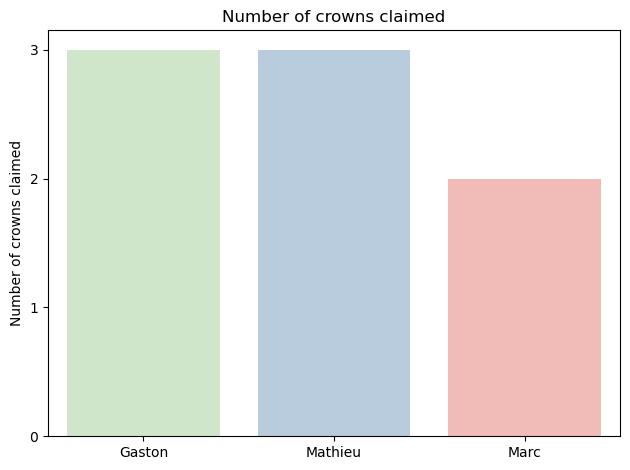

In [9]:
# number of times that a player claimed the crown

# need to remove first entry because crown was not claimed
crowns_claimed = dummy_df.drop(index=0).groupby('Name').count().rename({'Interval': 'Claimed'}, axis=1).sort_values('Claimed', ascending=False)


# plotting
sns.barplot(x=crowns_claimed.index, y=crowns_claimed.Claimed, palette=player_colors)

plt.xlabel('')
plt.yticks(range(0, int(np.ceil(crowns_claimed['Claimed'].max())) + 1))
plt.ylabel('Number of crowns claimed')
plt.title('Number of crowns claimed')
plt.tight_layout()
plt.show()

### 1.4 Total time as king

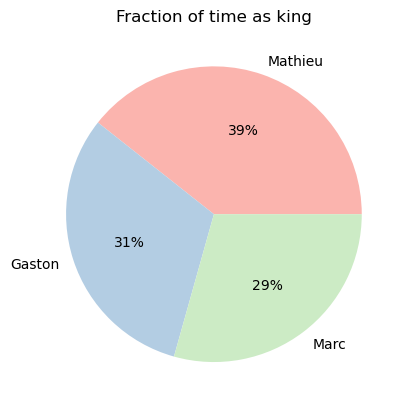

In [10]:
total_time_king = dummy_df.groupby('Name').sum().rename({'Interval': 'Duration'}, axis=1).sort_values('Duration', ascending=False)

# plotting
plt.pie(total_time_king['Duration'], labels=total_time_king.index, autopct='%.0f%%', colors=[player_colors[key] for key in player_colors])
plt.title('Fraction of time as king')
plt.show()

### 1.5 Mean reign duration

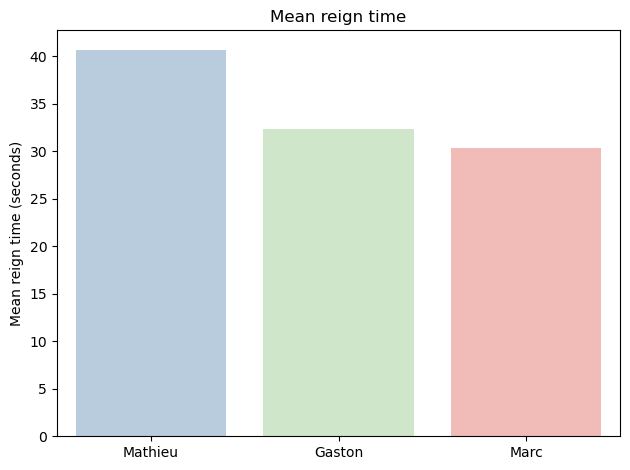

In [11]:
mean_reign_time = dummy_df.groupby('Name').mean().rename({'Interval': 'Duration'}, axis=1).sort_values('Duration', ascending=False)

# plotting
sns.barplot(x=mean_reign_time.index, y=mean_reign_time.Duration, palette=player_colors)

plt.xlabel('')
plt.ylabel('Mean reign time (seconds)')
plt.title('Mean reign time')
plt.tight_layout()
plt.show()


### 1.6 (experimental) Transition graph

Goal is to have something like this
```
Gaston        x-------------x
              |             |
Marc    ------x             |               x------>
                            |               |
Mathieu                     x---------------x
```

One possible way:
1. Encode each name by int value
2. Transform time interval to percentage of game time.
3. Create vector of length 100 with encoding values of player.

In [12]:
dummy_df['interval_perc'] = dummy_df['Interval'].apply(lambda x: int(np.ceil(x/total_duration_seconds * 100)))
dummy_df

,Name,Interval,interval_perc
0,Marc,76,25
1,Mathieu,21,7
2,Gaston,12,4
3,Marc,14,5
4,Mathieu,65,21
5,Gaston,60,20
6,Mathieu,36,12
7,Gaston,25,9
8,Marc,1,1


In [13]:
graph_vector = []

for _, transition in dummy_df.iterrows():
    graph_vector.extend(transition.Name for i in range(transition.interval_perc))



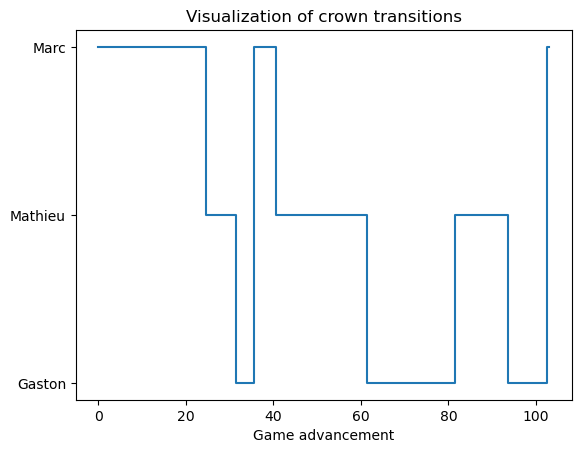

In [14]:
sns.lineplot(x=range(len(graph_vector)), y=graph_vector, drawstyle='steps-mid')
plt.xlabel('Game advancement')
plt.title('Visualization of crown transitions')
plt.show()

### Summary

Game duration: 0:05:10 
First king: Marc | Last king: Marc 


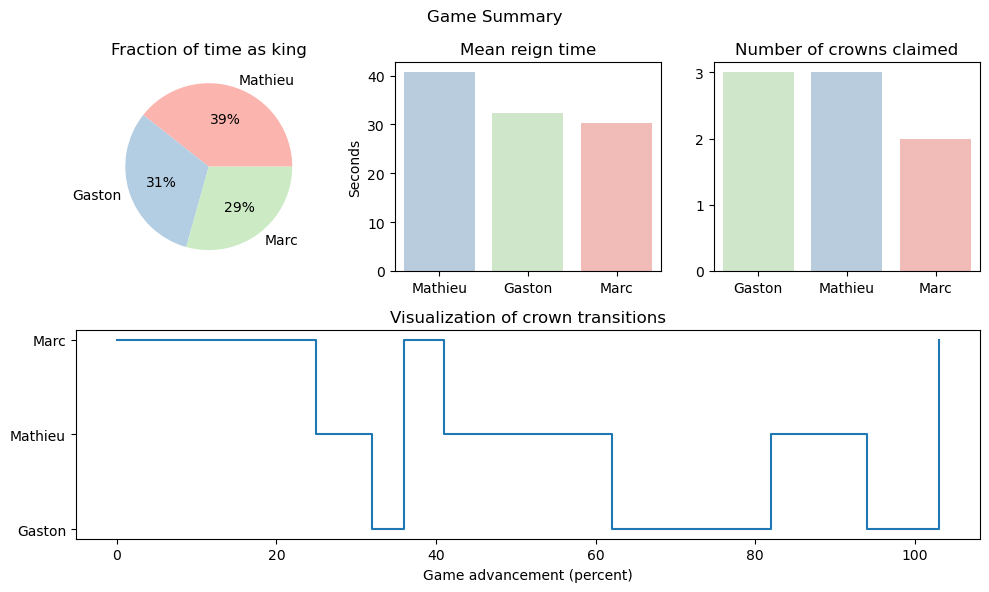

In [23]:
print('Game duration: %s ' % str(timedelta(seconds=int(total_duration_seconds))))
print('First king: %s | Last king: %s ' % (dummy_df.iloc[0]['Name'], dummy_df.iloc[-1]['Name']))

fig = plt.figure(tight_layout=True, figsize=(10, 6))
gs = gridspec.GridSpec(2, 3)

# Total Time as king
ax = fig.add_subplot(gs[0, 0])
ax.pie(total_time_king['Duration'], labels=total_time_king.index, autopct='%.0f%%', colors=[player_colors[key] for key in player_colors])
ax.set_title('Fraction of time as king')

# Mean Reign time
ax = fig.add_subplot(gs[0, 1])
sns.barplot(x=mean_reign_time.index, y=mean_reign_time.Duration, palette=player_colors, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Seconds')
ax.set_title('Mean reign time')

# Crowns claimed
ax = fig.add_subplot(gs[0, 2])
sns.barplot(x=crowns_claimed.index, y=crowns_claimed.Claimed, palette=player_colors, ax=ax)
ax.set_yticks(range(0, int(np.ceil(crowns_claimed['Claimed'].max())) + 1))
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Number of crowns claimed')

# Transition graph
ax = fig.add_subplot(gs[1, :])
sns.lineplot(x=range(len(graph_vector)), y=graph_vector, drawstyle='steps', ax=ax)
ax.set_xlabel('Game advancement (percent)')
ax.set_title('Visualization of crown transitions')

fig.suptitle('Game Summary')

plt.show()